In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(3)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
print(train['cut'].value_counts())

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64


In [9]:
print(train['clarity'].value_counts())

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


In [11]:
print(train['color'].value_counts())

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64


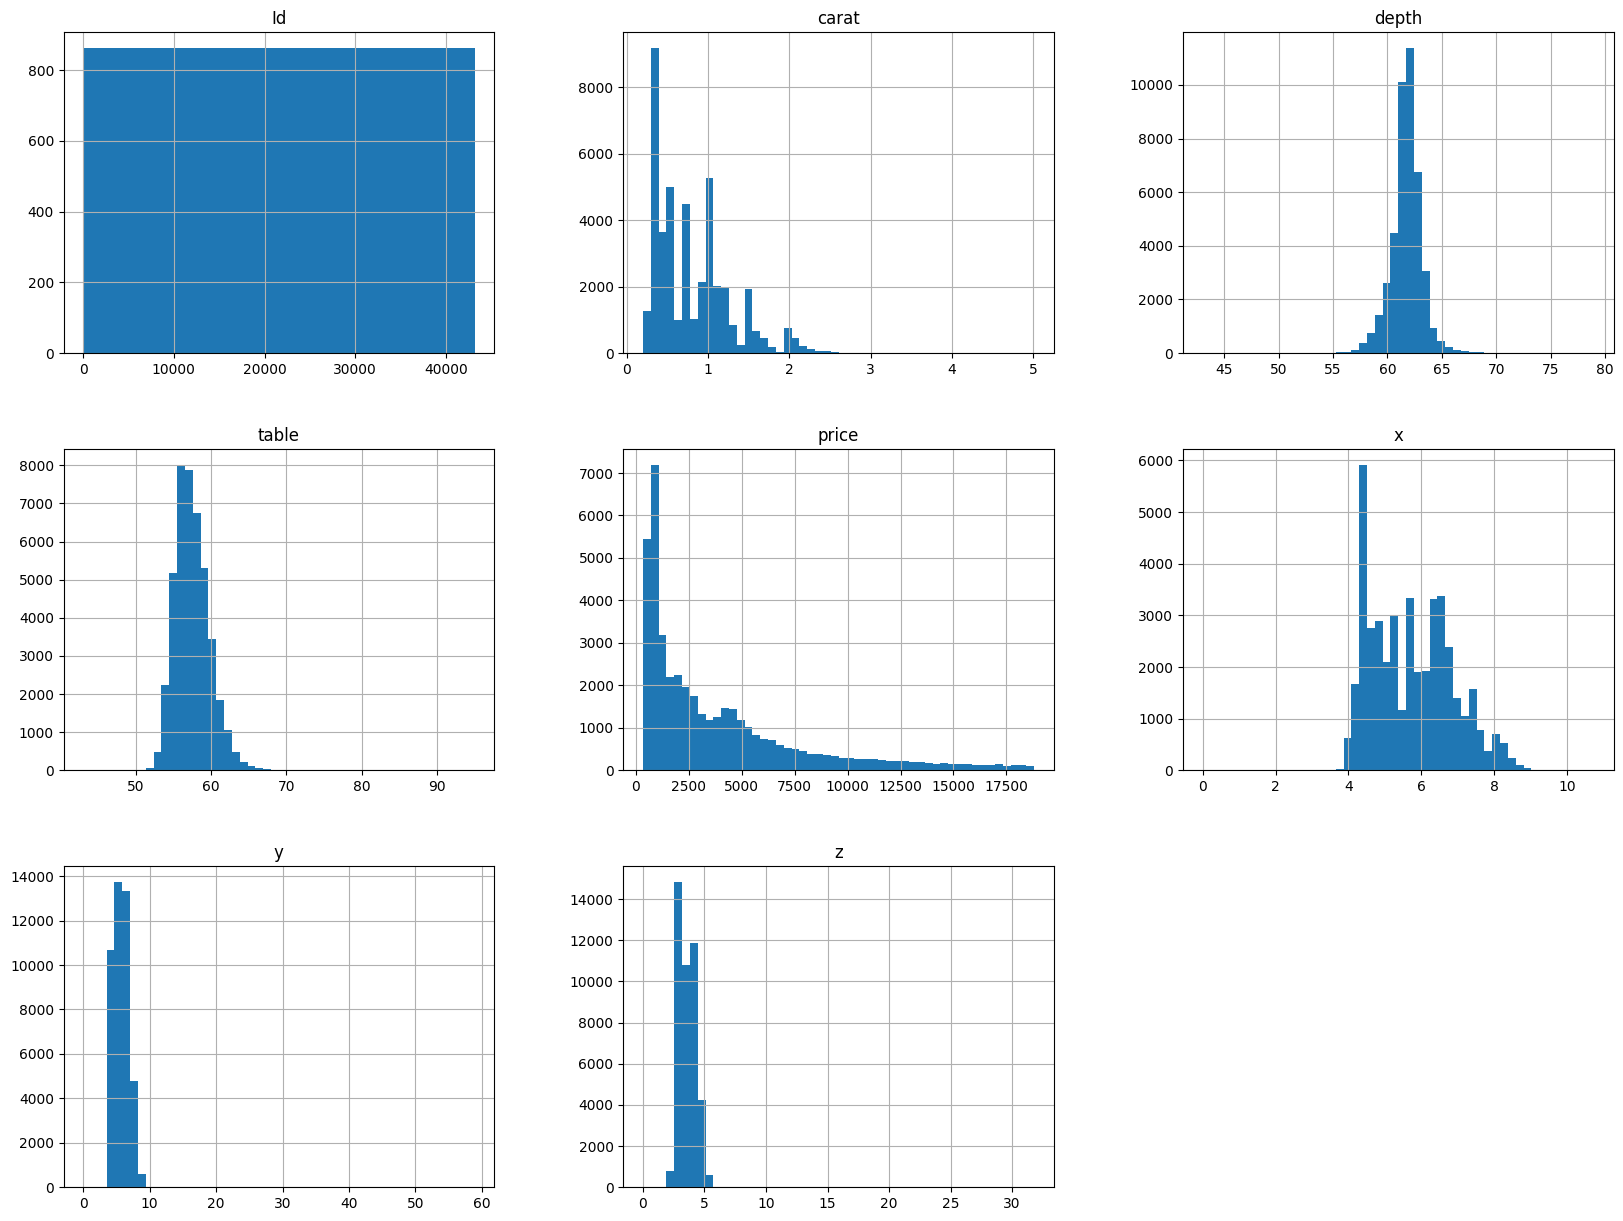

In [12]:

train.hist(bins=50, figsize=(20,15))
plt.show()

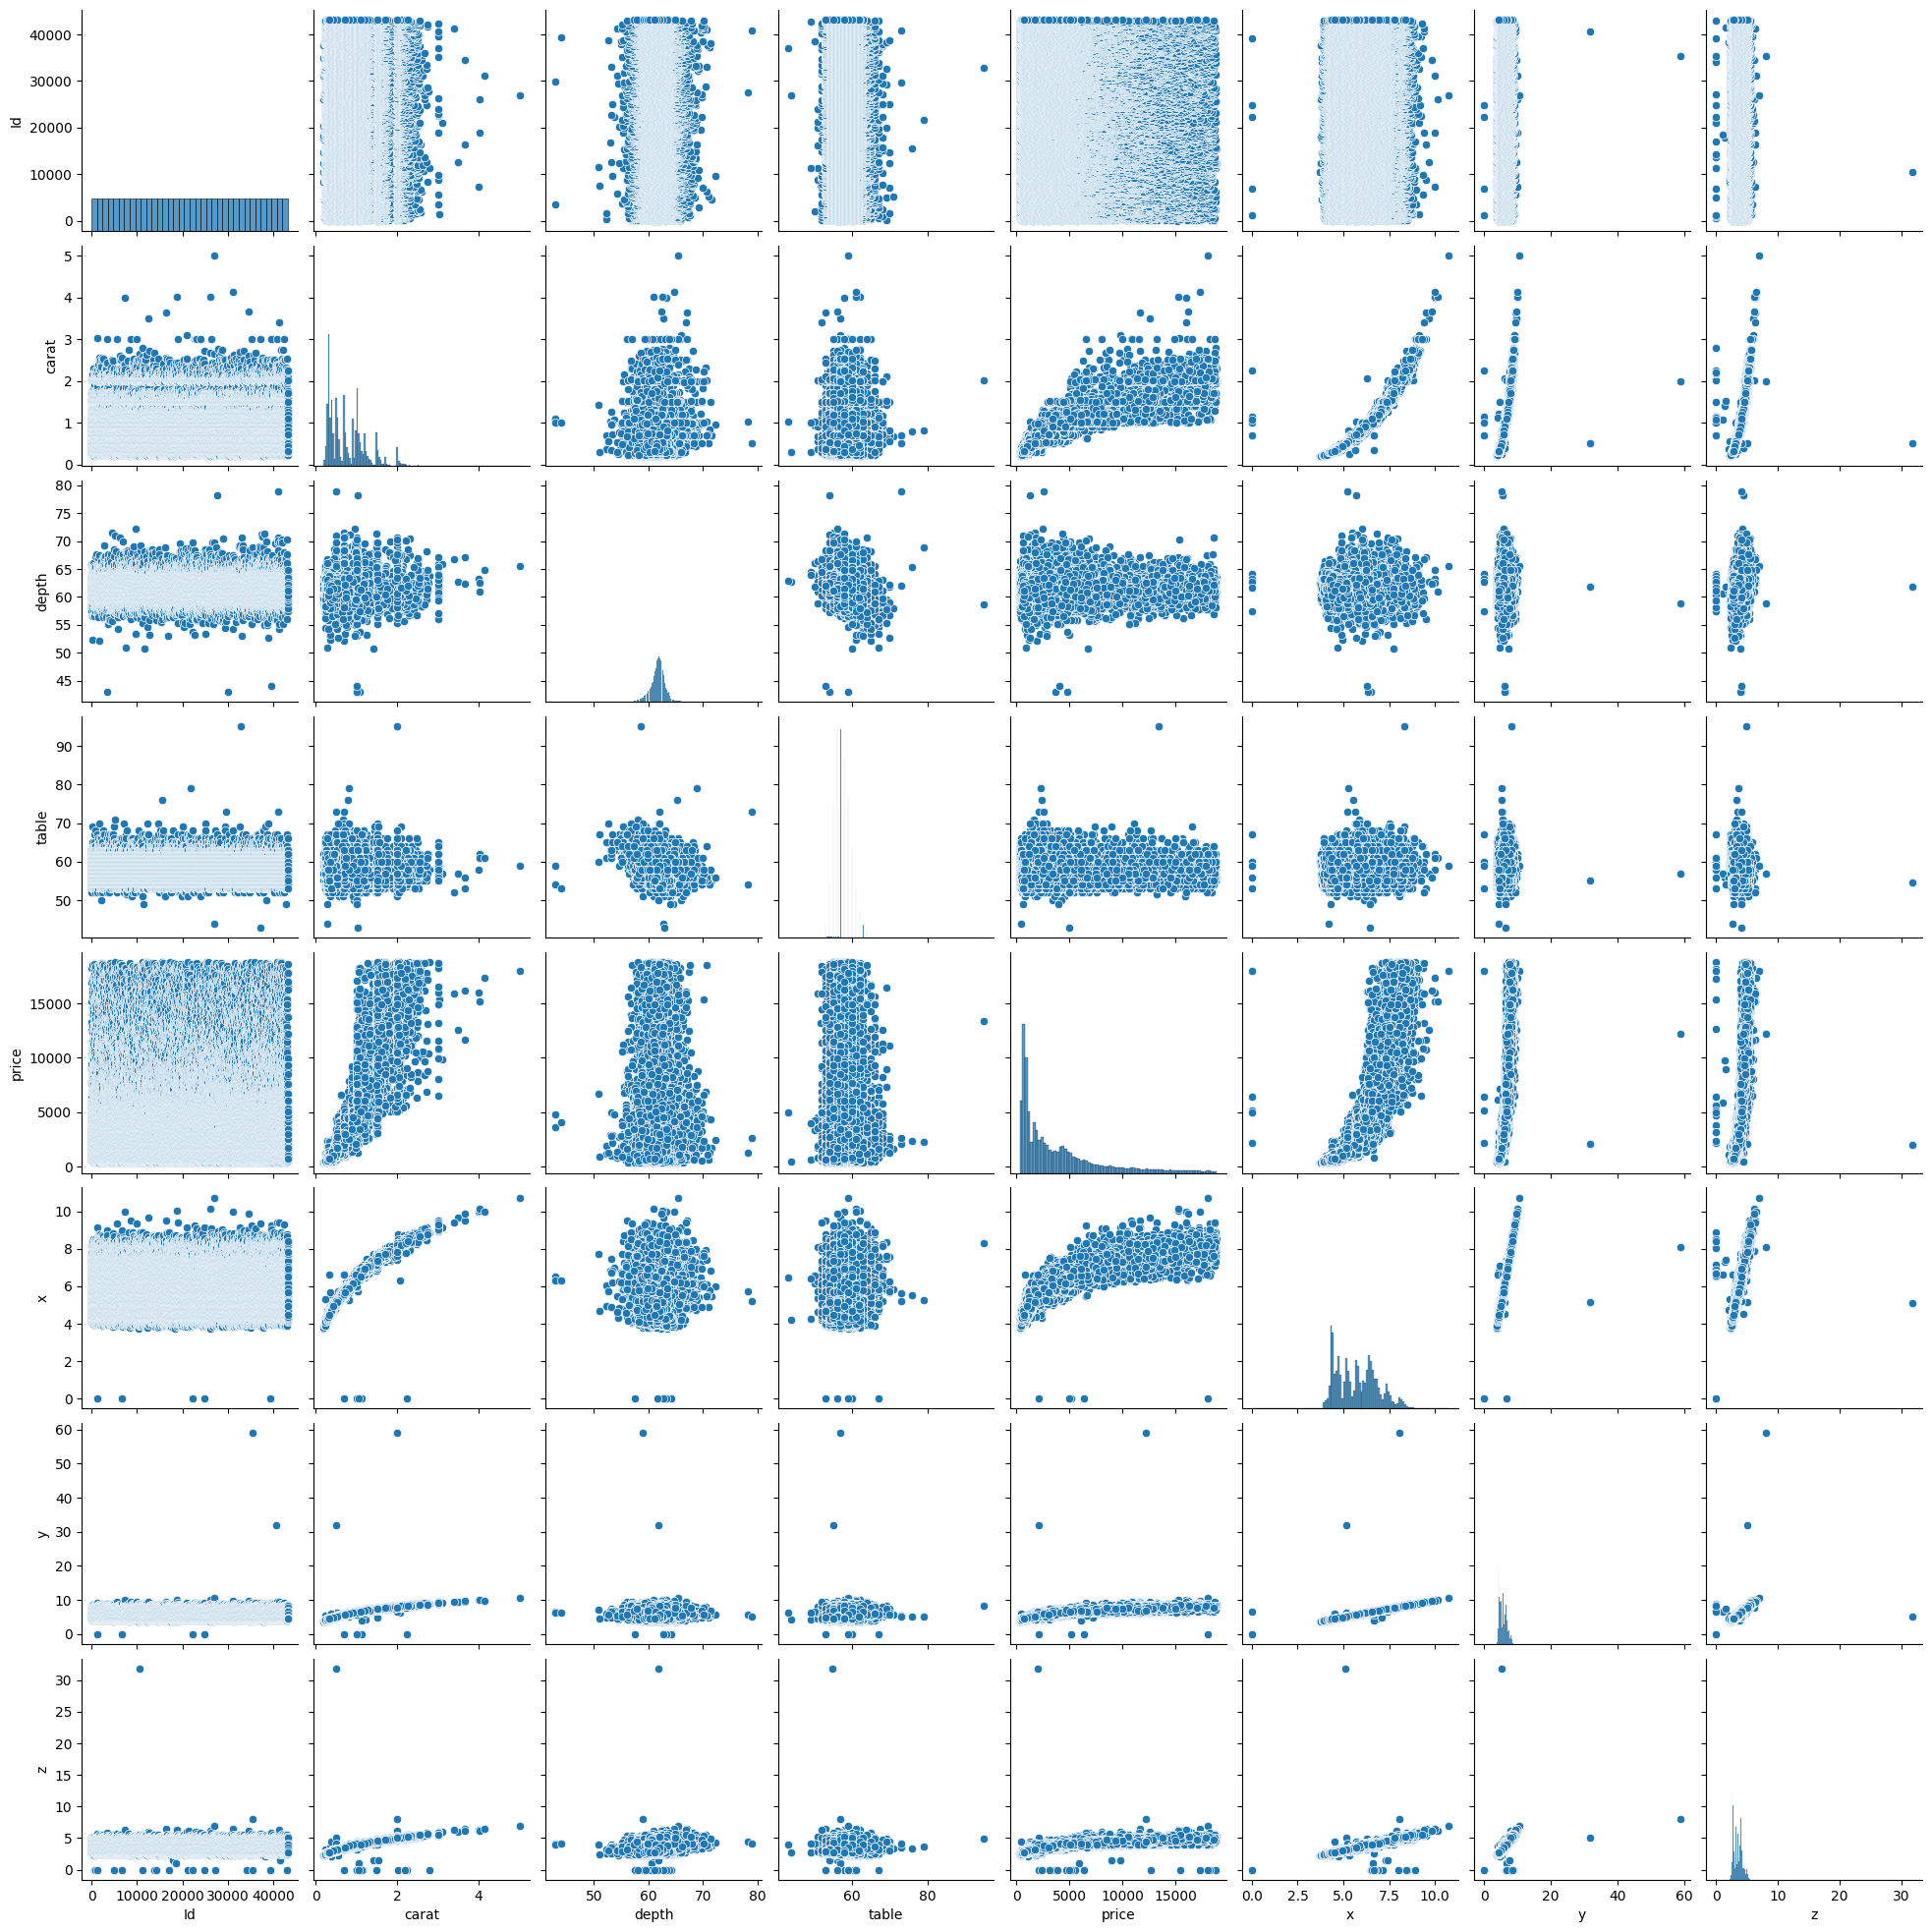

In [14]:
#sns.countplot(train)
#plt.show()
sns.pairplot(train)
plt.show()

Numerical columns: Index(['Id', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')




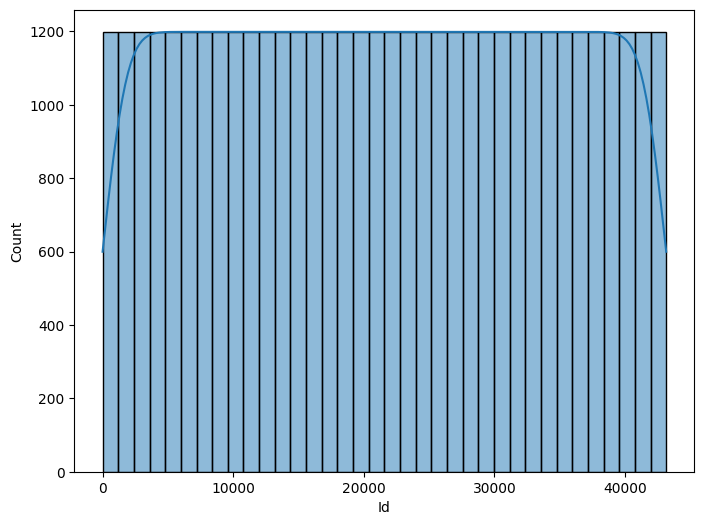

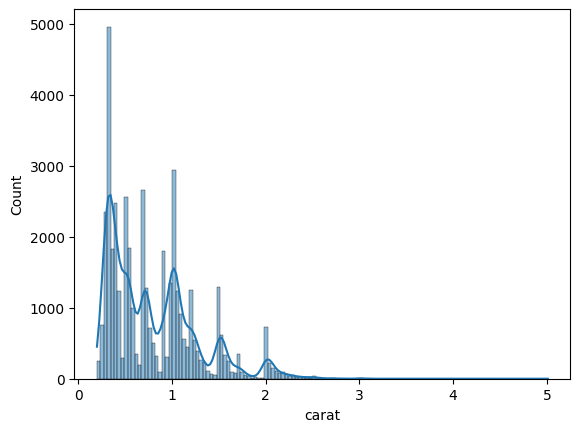

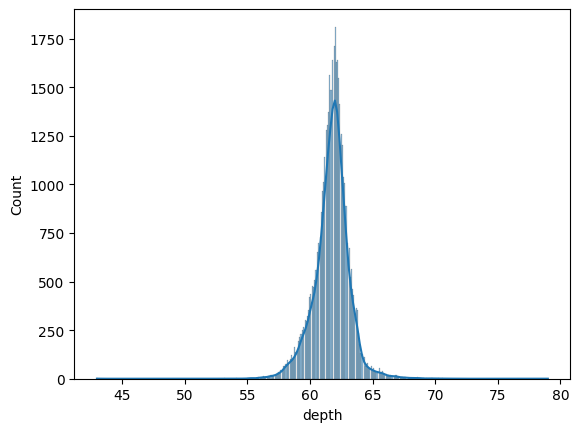

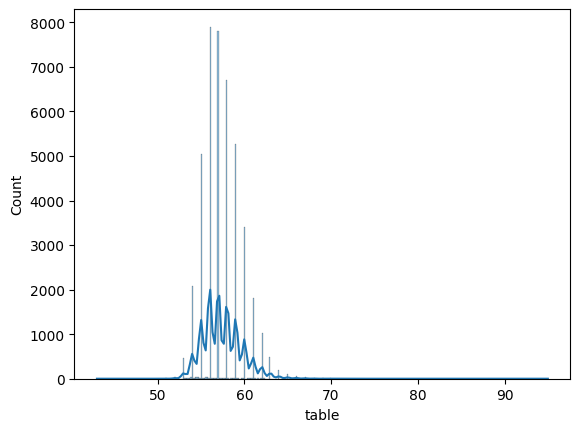

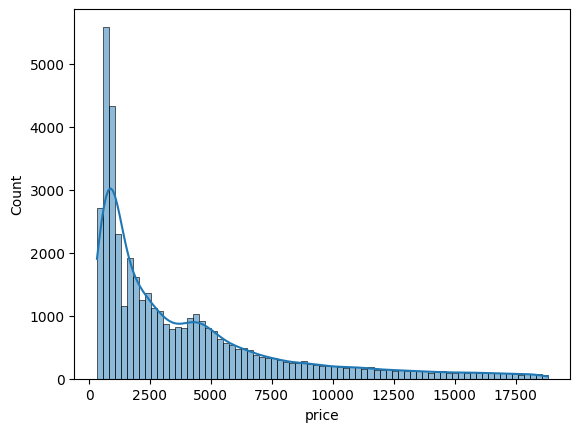

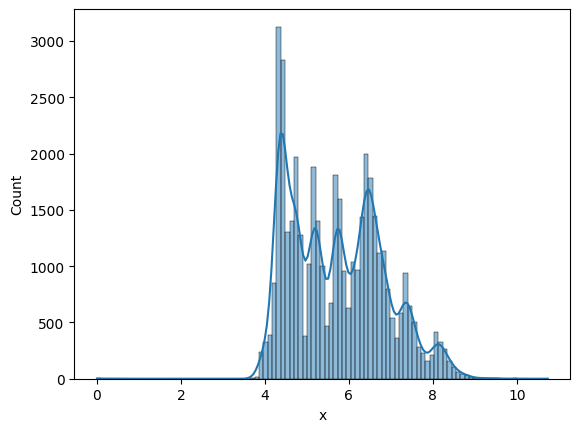

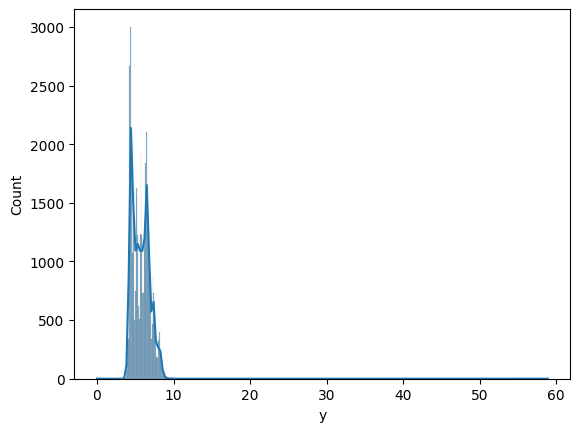

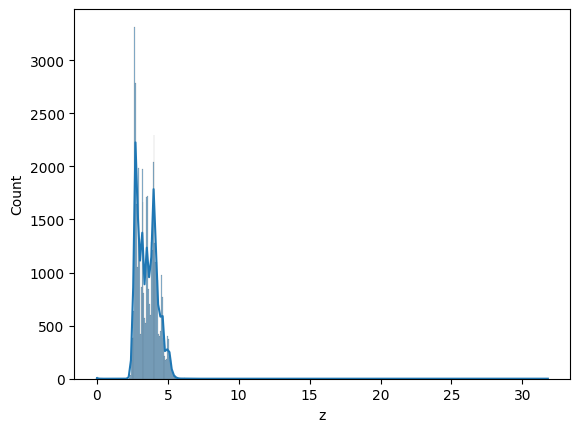

In [22]:
numerical_columns=train.columns[train.dtypes!='object']
categorical_columns=train.columns[train.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=train,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

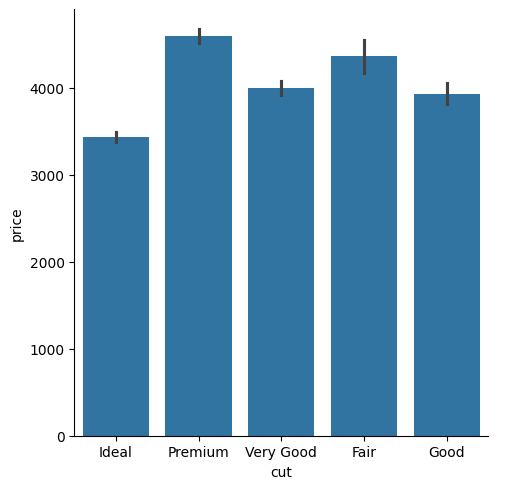

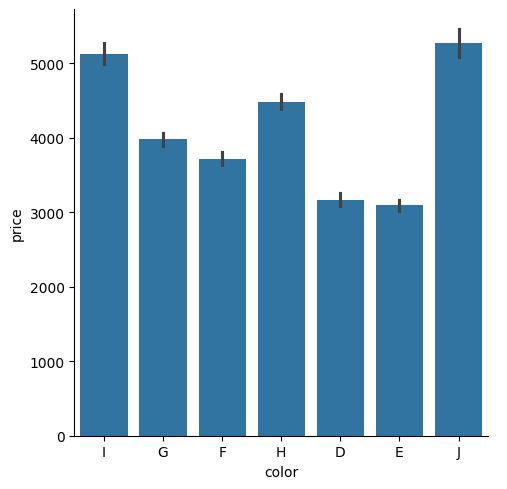

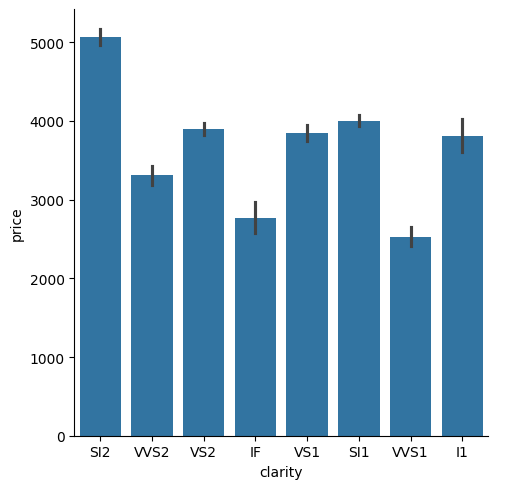

In [23]:
## For categorical data
plt.figure(figsize=(8,6))

for i in categorical_columns:
    sns.catplot(data=train,x=i,y="price",kind="bar")
    print('\n')
    plt.show()

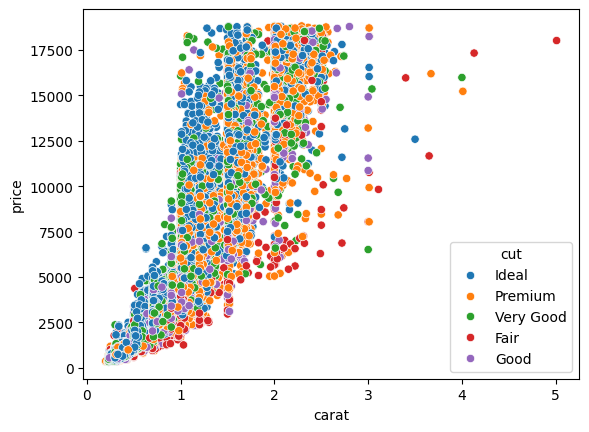

In [19]:
sns.scatterplot(x='carat', y='price', data=train,hue='cut')
plt.show()

In [19]:
corr_matrix = train.corr()
corr_matrix["price"].sort_values(ascending=False)

C:\Users\Ma\AppData\Local\Temp\ipykernel_31116\3205065796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64

In [21]:
lb = LabelEncoder()
train['cut'] = lb.fit_transform(train['cut'])
train['color'] = lb.fit_transform(train['color'])
train['clarity'] = lb.fit_transform(train['clarity'])
train.head()

test['cut'] = lb.fit_transform(test['cut'])
test['color'] = lb.fit_transform(test['color'])
test['clarity'] = lb.fit_transform(test['clarity'])
test.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


<Axes: >

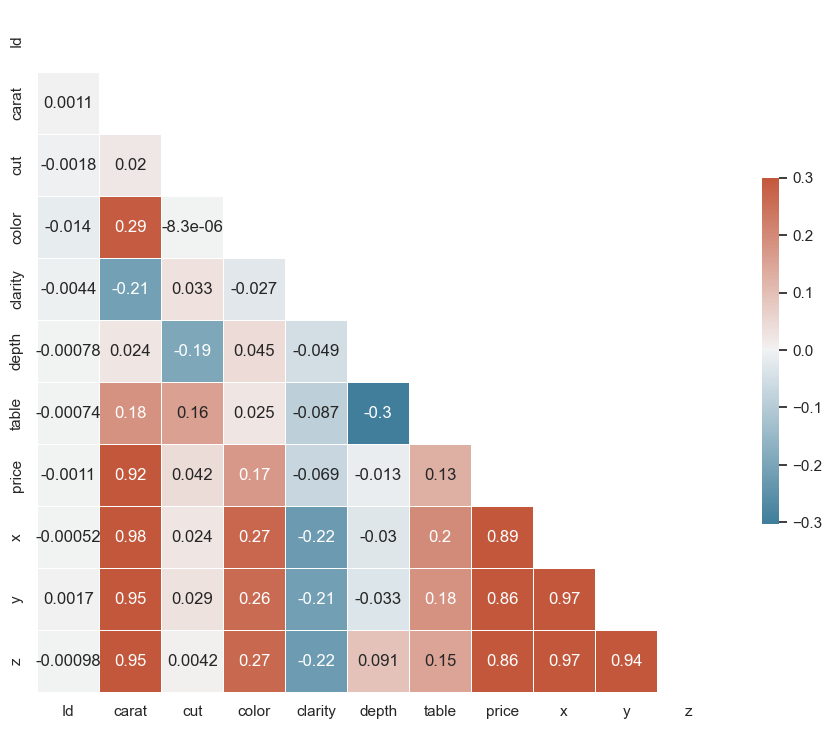

In [26]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab417452-7889-4cb1-949d-02a1a91d883b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>